In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
# Step 1: Load the dataset 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data 

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<function matplotlib.pyplot.show(close=None, block=None)>

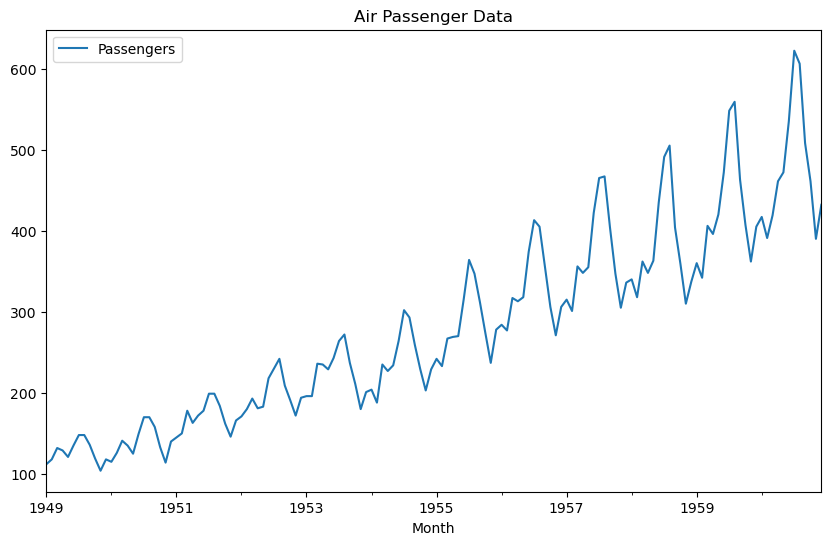

In [5]:
# Step 2: Visualize the original data 
data.plot(title="Air Passenger Data", figsize=(10,6))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

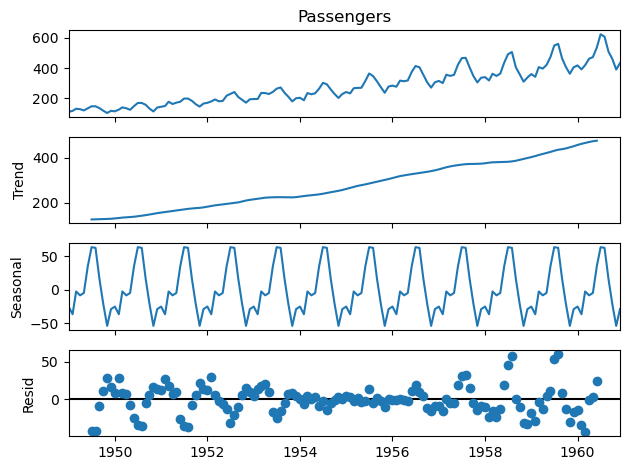

In [8]:
# Step 3: Perform time series decomposition to extract trend, seasonality, and residuals
result = seasonal_decompose(data['Passengers'], model='additive')
result.plot()
plt.show

In [10]:
# Step 4: Apply the ARIMA model for forecasting 
# Define ARIMA parameters (p,d,q)
model_arima = ARIMA (data['Passengers'], order=(4, 1, 1))

# Fit the model
arima_result = model_arima.fit()

# Generate predictions using ARIMA
data['ARIMA_Predictions'] = arima_result.predict(start=1, end=len(data), dynamic= False)
data 

C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Passengers,ARIMA_Predictions
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.040619
1949-03-01,132,119.849452
1949-04-01,129,135.981216
1949-05-01,121,124.559777
...,...,...
1960-08-01,606,629.699400
1960-09-01,508,580.096670
1960-10-01,461,449.510715


In [16]:
# Forecast 12 months into the future
forecast_arima = arima_result.get_forecast(steps=12)
forecast_arima_index = pd.date_range(data.index[-1], periods=12, freq='MS')
forecast_arima_values = forecast_arima.predicted_mean
forecast_arima_ci = forecast_arima.conf_int()

In [17]:
forecast_arima_index = pd.date_range(data.index[-1], periods=12, freq='MS')
forecast_arima_index

DatetimeIndex(['1960-12-01', '1961-01-01', '1961-02-01', '1961-03-01',
               '1961-04-01', '1961-05-01', '1961-06-01', '1961-07-01',
               '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [18]:
forecast_arima_values = forecast_arima.predicted_mean
forecast_arima_values

1961-01-01    492.162304
1961-02-01    499.607983
1961-03-01    513.890673
1961-04-01    481.964291
1961-05-01    474.161126
1961-06-01    470.581281
1961-07-01    473.613117
1961-08-01    484.414520
1961-09-01    483.448839
1961-10-01    484.854975
1961-11-01    480.993289
1961-12-01    479.255985
Freq: MS, Name: predicted_mean, dtype: float64

In [20]:
# Step 5: Apply Exponential Smoothing for forecasting 
# Define the model with trend and seasonality
model_exp = ExponentialSmoothing(data['Passengers'],
                                 trend='additive',
                                 seasonal='additive',
                                 seasonal_periods=12)

# Fit the model
exp_result = model_exp.fit()

# Generate fitted values for Exponential Smoothing
data['Exp_Smoothing'] = exp_result.fittedvalues

# Forecast 12 months into the future
forecast_exp = exp_result.forecast(steps=12)

C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


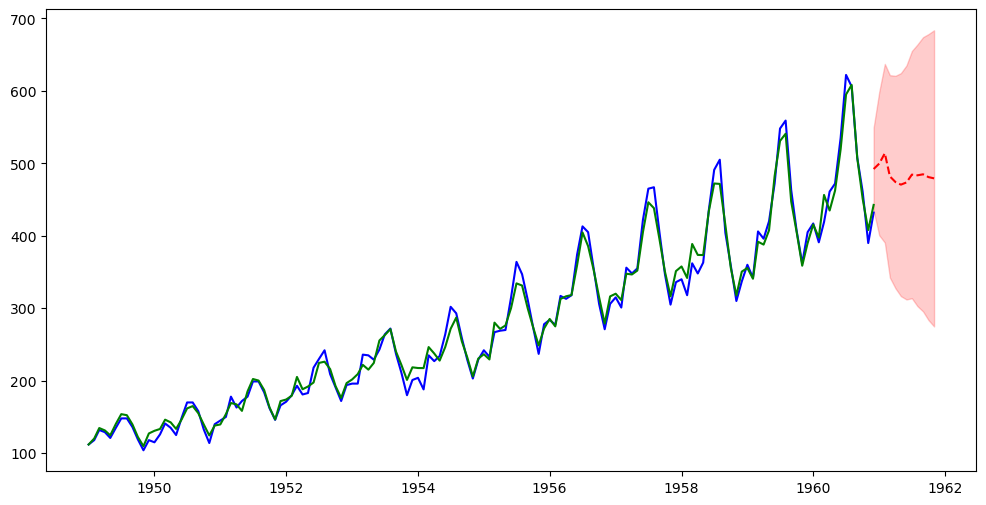

In [21]:
# Step 6: Visualize and compare predictions and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label="Original", color='blue') # Original data
#plt.plot(data['ARIMA_Predictions'], label="ARIMA Predictions", color='orange') # ARIMA predictions
plt.plot(data['Exp_Smoothing'], label="Exponential Smoothing", color='green') # Exponential Smoothing predictions

#Add ARIMA Forecas't
plt.plot(forecast_arima_index, forecast_arima_values, label="ARIMA Forecast", color='red', linestyle='dashed')
plt.fill_between(forecast_arima_index,
                 forecast_arima_ci.iloc[:,0],
                 forecast_arima_ci.iloc[:,1],
                 color='red', alpha=0.2, label="ARIMA Confidence Interval")

<function matplotlib.pyplot.show(close=None, block=None)>

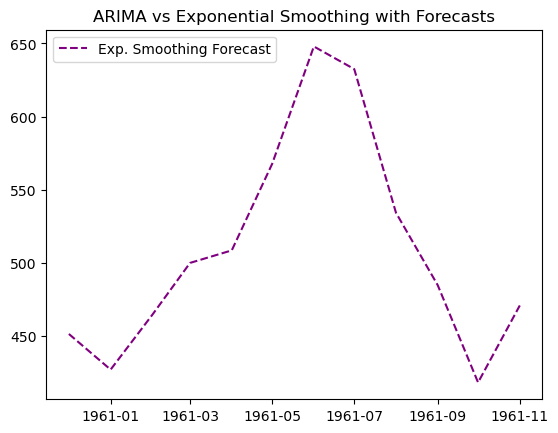

In [22]:
# Add Exponnetial Smoothing Forecast
plt.plot(forecast_arima_index, forecast_exp, label="Exp. Smoothing Forecast", color='purple', linestyle='dashed')

plt.legend()
plt.title("ARIMA vs Exponential Smoothing with Forecasts")
plt.show

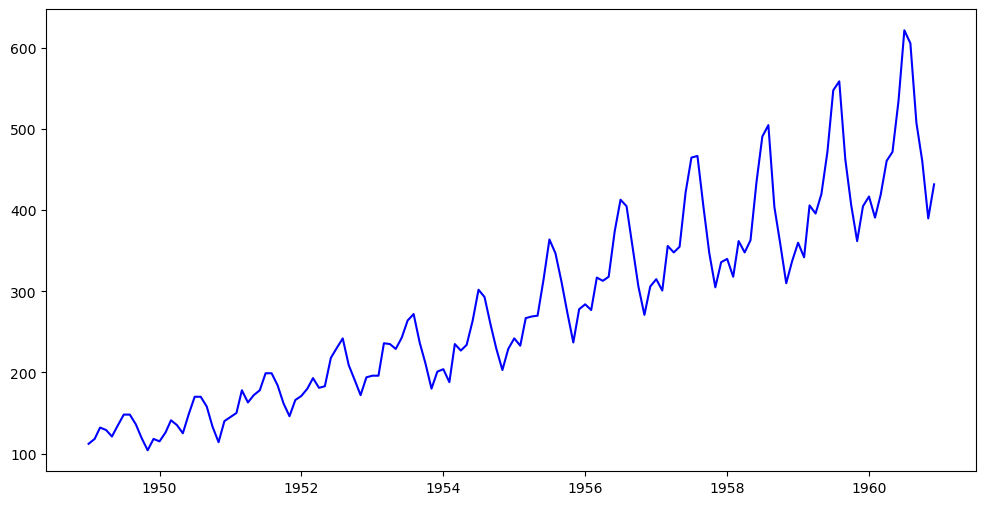

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label="Original", color='blue') # Original data

In [25]:
# Manually making predictions

# Combine ARIMA and Exponential Smoothing Forecasts into a Dataframe
forecast_df = pd.DataFrame({
    'Date': forecast_arima_index,
    'ARIMA_Forecast': forecast_arima_values,
    'Exp_Smoothingg_Forecast': forecast_exp
}).set_index('Date')

print(f"Forecast range: (forecast_arima_index.min().date()) to {forecast_arima_index.max().date()}")

Forecast range: (forecast_arima_index.min().date()) to 1961-11-01


In [27]:
# Function to get the forecast for a specific date 
def get_forecast(date):
    date = pd.to_datetime(date)  # Ensure the input is in datetime format
    if date in forecast_df.index:
        result = forecast_df.loc[date]
        return f"Forecast for {date.date()}:\nARIMA: {result['ARIMA_Forecast']:.2f}, Exponential Smoothing: {result['ExponentialSmoothing_Forecast']:.2f}"
    else:
        return "Date not in forecast range. Please provide a valid date within the forecast period."

In [ ]:
# Example: Get forecast for a specific date
user_date = input("2025-02-02")
print(get_forecast(user_date))